In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Project requirement 1.) Import data

In [53]:
df= pd.read_csv("co2.csv")
df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km�
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km�
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km�
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km�
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km�
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km�
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km�
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km�
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km�


Project requirement 2.) Use built-in pandas or numpy functions. Renaming a column for readability here

In [54]:
df.rename(columns = {'% of World':'Percent of world'}, inplace = True)
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,Percent of world,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km�
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km�
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km�
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km�
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km�


Using pandas built-in function to print a concise summary of this DataFrame

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   Percent of world     55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


4.) Visualize you data with 2 basic plots.

Identifying years of significant increase in CO2 Emissions worldwide

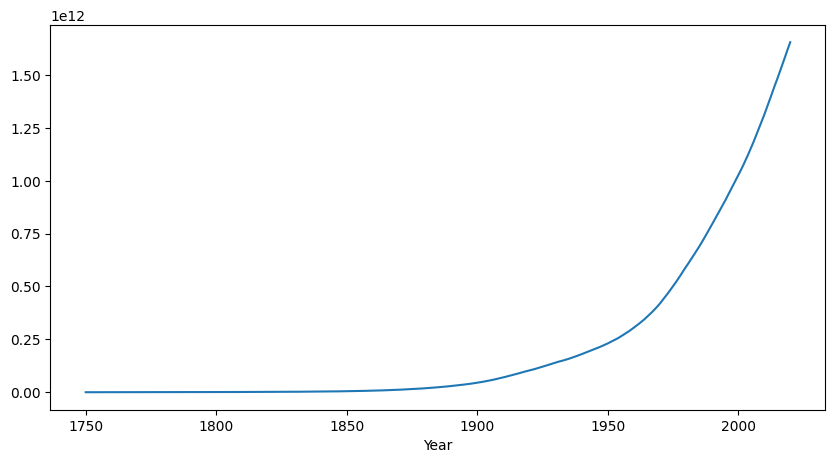

In [68]:
df.groupby('Year')['CO2 emission (Tons)'].sum().plot(figsize=(10,5));

Sorting the top 30 countries by total emissions in 2020

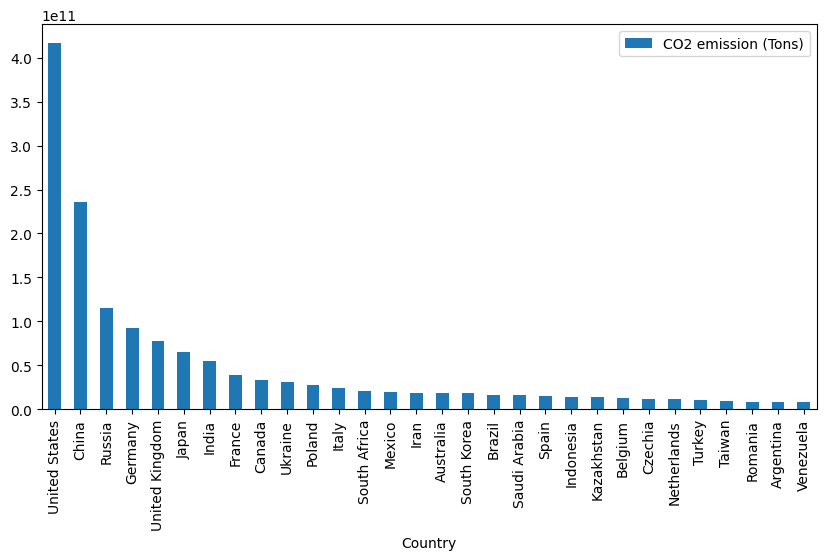

In [67]:
df[df['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(30).plot.bar(x='Country',y='CO2 emission (Tons)',figsize=(10,5));

Finding the top five countries by CO2 emissions in 2020

In [59]:
top_five = df[df['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head()
top_five

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,Percent of world,Density(km2)
57180,United States,US,1,2020,4.170000e+11,3.382899e+08,9372610.0,6.10%,36/km�
10839,China,CN,86,2020,2.360000e+11,1.425887e+09,9706961.0,6.30%,147/km�
44443,Russia,NaN,7,2020,1.150000e+11,1.447133e+08,17098242.0,11.00%,8/km�
20324,Germany,DE,49,2020,9.263562e+10,8.336984e+07,357114.0,0.20%,233/km�
56909,United Kingdom,GB,44,2020,7.816115e+10,6.750894e+07,242900.0,0.20%,278/km�


In [63]:
top_five['CO2 emission (Tons)'].sum()

938796760733.0

In [88]:
usa_data = df.loc[df['Country'] == 'United States']
usa_data

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,Percent of world,Density(km2)
56910,United States,US,1,1750,0.000000e+00,338289857.0,9372610.0,6.10%,36/km�
56911,United States,US,1,1751,0.000000e+00,338289857.0,9372610.0,6.10%,36/km�
56912,United States,US,1,1752,0.000000e+00,338289857.0,9372610.0,6.10%,36/km�
56913,United States,US,1,1753,0.000000e+00,338289857.0,9372610.0,6.10%,36/km�
56914,United States,US,1,1754,0.000000e+00,338289857.0,9372610.0,6.10%,36/km�
...,...,...,...,...,...,...,...,...,...
57176,United States,US,1,2016,3.960000e+11,338289857.0,9372610.0,6.10%,36/km�
57177,United States,US,1,2017,4.010000e+11,338289857.0,9372610.0,6.10%,36/km�
57178,United States,US,1,2018,4.070000e+11,338289857.0,9372610.0,6.10%,36/km�
57179,United States,US,1,2019,4.120000e+11,338289857.0,9372610.0,6.10%,36/km�
